In [1]:
import pymc as pm
import graphviz
import arviz as az
az.style.use('seaborn')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/var/folders/kz/3m7b5b5n7n19qtpq86vft4ww0000gn/T/ipykernel_72055/4269894452.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  az.style.use('seaborn')


### Generate data

In [2]:
num_samples = 5_000
random_numbers = np.random.lognormal(mean=0.02, sigma=0.5, size=num_samples)
default_rates = random_numbers*0.01

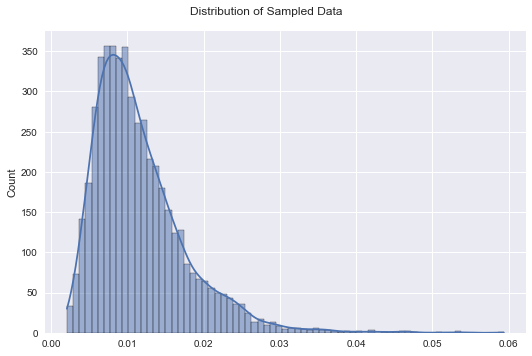

In [3]:
sample_distribution = sns.displot(
    data = default_rates,
    kde = True,
    aspect = 1.5
)

sample_distribution.fig.suptitle('Distribution of Sampled Data')

plt.tight_layout();

### Specify model and *"push inference button"*

In [4]:
# Prior parameters
num_SMEs = 1_000
default_rate_prior_alpha = 2
default_rate_prior_beta = 5

In [5]:
# Model definition
with pm.Model() as default_rate_model:
    default_rate = pm.Beta('default_rate', alpha=default_rate_prior_alpha, beta=default_rate_prior_beta)
    defaults = pm.Binomial('defaults', n=num_SMEs, p=default_rate, observed=default_rates)
    trace = pm.sample(15_000, tune=10_500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [default_rate]


Sampling 4 chains for 10_500 tune and 15_000 draw iterations (42_000 + 60_000 draws total) took 29 seconds.


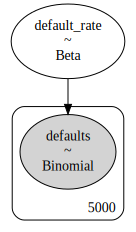

In [6]:
pm.model_to_graphviz(default_rate_model)

### Check posterior predictive

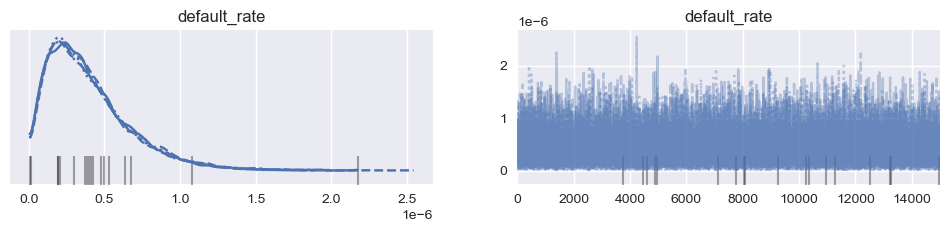

In [7]:
az.plot_trace(trace);

### Summarize posterior

In [8]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
default_rate,0.0,0.0,0.0,0.0,0.0,0.0,21359.0,22039.0,1.0


* see mean value for `default_rate` sampled from posterior distribution (3.7%)
* see value for `r_hat`: the closer it is to `1`, the more the model converges

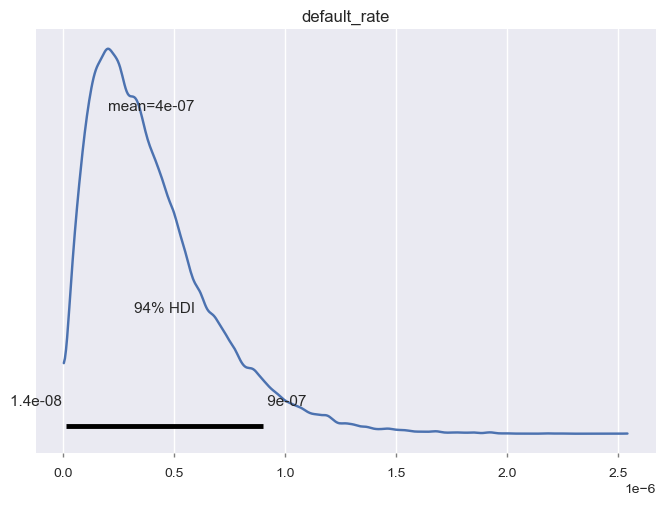

In [9]:
# Posterior analysis
az.plot_posterior(trace, var_names=['default_rate']);